# Carga de datos

In [1]:
#Como primer paso, importamos las librerias a utilizar

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.graph_objects as go

In [2]:
#Luego abrimos la ruta de archivos, con cada df correspondiente 

ruta_de_archivos = r'C:\Users\mbdia\Desktop\UPSO\2025\Big data\Datasets'

archivo = os.listdir(ruta_de_archivos)
archivo


['Dataset_de_ventas_Abril.csv',
 'Dataset_de_ventas_Agosto.csv',
 'Dataset_de_ventas_Diciembre.csv',
 'Dataset_de_ventas_Enero.csv',
 'Dataset_de_ventas_Febrero.csv',
 'Dataset_de_ventas_Julio.csv',
 'Dataset_de_ventas_Junio.csv',
 'Dataset_de_ventas_Marzo.csv',
 'Dataset_de_ventas_Mayo.csv',
 'Dataset_de_ventas_Noviembre.csv',
 'Dataset_de_ventas_Octubre.csv',
 'Dataset_de_ventas_Septiembre.csv']

In [3]:
# Listamos los archivos en la ruta
archivos = os.listdir(ruta_de_archivos)

# Iteramos sobre cada archivo
for archivo in archivos:
    # Creamos la ruta completa para cada archivo
    ruta_completa = os.path.join(ruta_de_archivos, archivo)
    print(ruta_completa)

C:\Users\mbdia\Desktop\UPSO\2025\Big data\Datasets\Dataset_de_ventas_Abril.csv
C:\Users\mbdia\Desktop\UPSO\2025\Big data\Datasets\Dataset_de_ventas_Agosto.csv
C:\Users\mbdia\Desktop\UPSO\2025\Big data\Datasets\Dataset_de_ventas_Diciembre.csv
C:\Users\mbdia\Desktop\UPSO\2025\Big data\Datasets\Dataset_de_ventas_Enero.csv
C:\Users\mbdia\Desktop\UPSO\2025\Big data\Datasets\Dataset_de_ventas_Febrero.csv
C:\Users\mbdia\Desktop\UPSO\2025\Big data\Datasets\Dataset_de_ventas_Julio.csv
C:\Users\mbdia\Desktop\UPSO\2025\Big data\Datasets\Dataset_de_ventas_Junio.csv
C:\Users\mbdia\Desktop\UPSO\2025\Big data\Datasets\Dataset_de_ventas_Marzo.csv
C:\Users\mbdia\Desktop\UPSO\2025\Big data\Datasets\Dataset_de_ventas_Mayo.csv
C:\Users\mbdia\Desktop\UPSO\2025\Big data\Datasets\Dataset_de_ventas_Noviembre.csv
C:\Users\mbdia\Desktop\UPSO\2025\Big data\Datasets\Dataset_de_ventas_Octubre.csv
C:\Users\mbdia\Desktop\UPSO\2025\Big data\Datasets\Dataset_de_ventas_Septiembre.csv


# Limpieza de los datos/Preparacion de los datos

En este punto procederemos a:
- Extraer datos importantes (En este caso el mes)
- Eliminar datos no numéricos.
- Eliminar filas incompletas

In [4]:
#Creamos un diccionario vacio para almacenar los dataframes
dataframes = {}

#Iteramos sobre todos los archivos para preparar datos
for archivo in archivos:
    #En este paso, decidimos utilizar split para dividir el nombre del archivo. Seleccionamos el cuarto elemento [3] para extraer el mes. 
    mes = archivo.split('_')[3].split('.')[0].capitalize() 
    ruta_completa = os.path.join(ruta_de_archivos, archivo)

    df = pd.read_csv(ruta_completa) #abrimos el csv
    df_ventas = df.copy() #creamos una copia para trabajar sobre ella

    ##Filtrado de datos
    #Convertimos las columnas a valores numericos, en el caso de existir alguna irregularidad, devuelve NaN gracias a coerce
    df_ventas['Cantidad Pedida'] = pd.to_numeric(df_ventas['Cantidad Pedida'], errors = 'coerce')
    df_ventas['Precio Unitario'] = pd.to_numeric(df_ventas['Precio Unitario'], errors = 'coerce')
    df_ventas['ID de Pedido'] = pd.to_numeric(df_ventas['ID de Pedido'], errors = 'coerce')
    
    #En este paso eliminamos los NaN filtrados. 
    df_ventas = df_ventas[~df_ventas['Cantidad Pedida'].isna()] 
    df_ventas = df_ventas[~df_ventas['Precio Unitario'].isna()]
    df_ventas = df_ventas[~df_ventas['ID de Pedido'].isna()]

    #Ahora sin datos vacios o irregulares, convertimos los valores a enteros para trabajar sobre ellos
    df_ventas['Cantidad Pedida'] = df_ventas['Cantidad Pedida'].astype(int)
    df_ventas['Precio Unitario'] = df_ventas['Precio Unitario'].astype(int)
    df_ventas['ID de Pedido'] = df_ventas['ID de Pedido'].astype(int)

    #Guardamos el dataframe en el diccionario
    dataframes[mes] = df_ventas 
    
    df_ventas

# Analisis de datos/Visualizacion de datos

1. Comportamiento de las ventas en los distintos meses:

* ¿Cómo variaron las ventas a lo largo de los diferentes meses?
* ¿Hubo algún mes que se destacó en términos de ventas?
* ¿Cuál es el ingreso total generado por mes?


In [5]:
#Creamos una lista vacia para acumular la suma de las ventas.
totales_ventas = []

#Definimos el orden de los meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre' ]

#Recorremos cada mes para sumar las ventas en cada uno y finalmente lo guardamos en la lista
for mes in meses: 
    dataframes_mes = dataframes[mes]
    total_ventas_mes = dataframes_mes ['Cantidad Pedida'].sum()
    totales_ventas.append(total_ventas_mes)

totales_ventas

#Graficamos

fig = go.Figure()

fig.add_trace(go.Bar(
    x = meses,
    y= totales_ventas,
    marker = dict(color = totales_ventas, colorscale = 'Viridis', colorbar = dict(title='Total de ventas', x = 1.0, thickness = 15)),
    text = totales_ventas 

))
fig.update_layout(
    title = "Total de ventas por mes",
    xaxis = dict(title='Mes'),
    yaxis = dict(title='Total de ventas'),
)


fig.show()

In [6]:
# En este caso, creamos la columna Recaudacion para multiplicar cantidad de productos por precio
dataframes_mes['Recaudacion'] = dataframes_mes['Cantidad Pedida'] * dataframes_mes['Precio Unitario']
#sumamos la columna para obtener la recaudacion total de cada mes
total_recaudacion_mes = dataframes_mes['Recaudacion'].sum()

# Creamos una lista vacia para almacenar los valores de cada mes
recaudacion_mensual = []

# Recorremos cada mes y finalmente sumamos los totales en la lista
for mes in meses:
    dataframes_mes = dataframes[mes]
    dataframes_mes['Recaudacion'] = dataframes_mes['Cantidad Pedida'] * dataframes_mes['Precio Unitario']
    total_recaudacion_mes = dataframes_mes['Recaudacion'].sum()
    recaudacion_mensual.append(total_recaudacion_mes)

# Graficamos
fig = go.Figure()

fig.add_trace(go.Bar(
    x = meses,
    y = recaudacion_mensual,
    marker = dict(color = recaudacion_mensual, colorscale = 'Cividis',
                colorbar = dict(title='Recaudación', x = 1.0, thickness = 15)),
    text = recaudacion_mensual
))
fig.update_layout(
    title = "Recaudación total por mes",
    xaxis = dict(title='Mes'),
    yaxis = dict(title='Recaudación'),
)

fig.show()


2. Optimización de la publicidad y patrón de ventas por hora:

* ¿Cuál es el momento ideal del día para presentar la publicidad y aumentar la probabilidad de compra?
* ¿Cómo cambian los patrones de ventas por hora a lo largo del año?
* ¿Hay modificaciones en los patrones de ventas durante las horas de mayor actividad en los distintos meses?

In [7]:
#Creamos una funcion para extraer datos, en este caso buscamos extraer informacion para el analisis del tiempo (hora, dia, mes)
def extraer_datos(datos):
    datos['Fecha de Pedido']=pd.to_datetime(datos['Fecha de Pedido'], format='%m/%d/%y %H:%M') 
    datos['Hora']= datos['Fecha de Pedido'].dt.hour
    datos['Dia']=datos ['Fecha de Pedido'].dt.day
    datos['Mes']=datos['Fecha de Pedido'].dt.month
    return datos

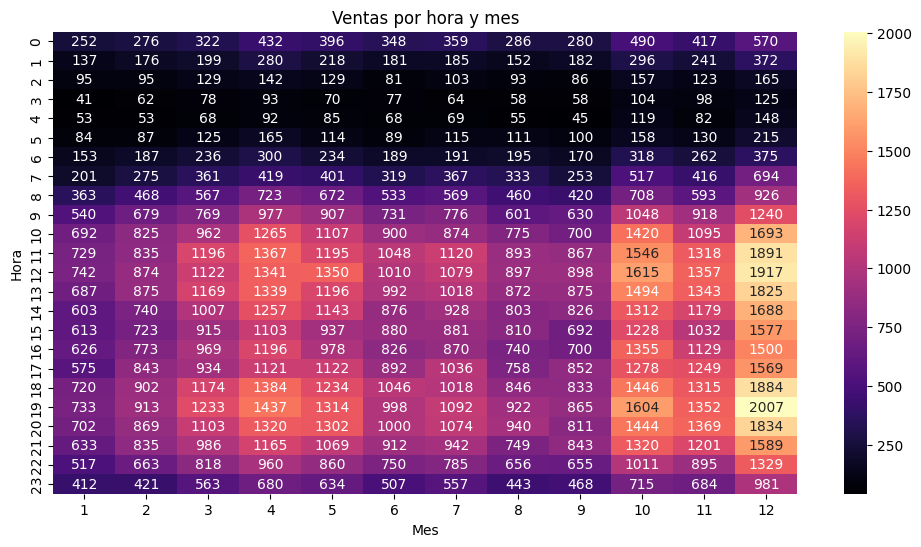

In [8]:
# Aplicamos la función a cada mes y juntamos todos los datos
df_todos = pd.concat([extraer_datos(dataframes[mes]) for mes in meses])

# Creamos tabla
tabla_heatmap = df_todos.pivot_table(index='Hora', columns='Mes', values='Cantidad Pedida', aggfunc='sum')

# Graficamos
plt.figure(figsize=(12,6))
sns.heatmap(tabla_heatmap, cmap="magma", annot=True, fmt="d")
plt.title("Ventas por hora y mes")
plt.xlabel("Mes")
plt.ylabel("Hora")
plt.show()



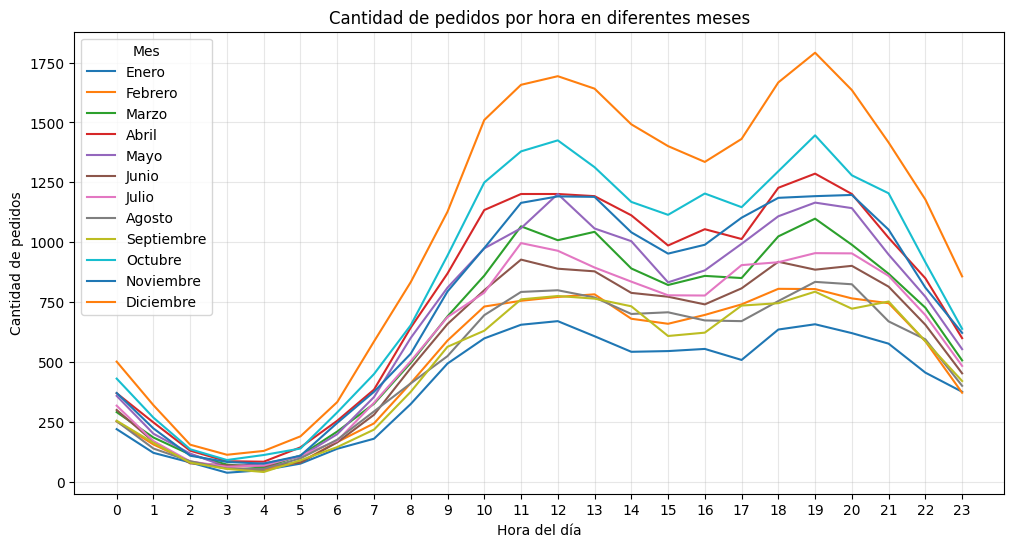

In [9]:
#En este caso, graficamos un line chart para visualizar de otra manera
plt.figure(figsize=(12,6))

# Recorremos mes a mes
for mes in meses:
    # filtramos por número de mes
    df_mes = df_todos[df_todos['Mes'] == meses.index(mes)+1] 
    ventas_por_hora = df_mes.groupby('Hora')['Cantidad Pedida'].count()
    
    plt.plot(ventas_por_hora.index, ventas_por_hora.values, label=mes)

plt.title("Cantidad de pedidos por hora en diferentes meses")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de pedidos")
plt.legend(title="Mes")
plt.xticks(range(0,24))  
plt.grid(alpha=0.3)
plt.show()


3. Distribución de ventas por ubicación:

* ¿En qué ciudades se han registrado las mayores ventas? ¿Cómo se comparan las ventas en diferentes estados o regiones?


In [10]:
# Cocatenamos todos los dataframes
ventas_concatenadas = pd.concat(dataframes.values(), ignore_index=True)

# Dividimos la columna Direccion de envio en 3 columnas: Calle, ciudad y PO BOX
direcciones = ventas_concatenadas['Dirección de Envio'].str.split(', ', expand=True)
direcciones.columns = ['Calle', 'Ciudad', 'PO BOX']
#Dividimos PO BOX en estado y postal
direcciones[['Estado','Postal']] = direcciones['PO BOX'].str.split(' ', expand=True)

# Concatenamos las columnas nuevas a las columnas originales
ventas_con_direcciones = pd.concat([ventas_concatenadas, direcciones], axis=1)

# Agrupamos por ciudad, sumamos la cantidad de productos vendidos en cada ciudad y reseteamos el index
ventas_por_ciudad = ventas_con_direcciones.groupby('Ciudad')['Cantidad Pedida'].sum().reset_index()

# Ordenamos por cantidad pedida
ventas_por_ciudad = ventas_por_ciudad.sort_values(by='Cantidad Pedida', ascending=False).reset_index(drop=True)

ventas_por_ciudad



,Ciudad,Cantidad Pedida
0,San Francisco,50239
1,Los Angeles,33289
2,New York City,27932
3,Boston,22528
4,Dallas,16730
5,Atlanta,16602
6,Seattle,16553
7,Portland,14053
8,Austin,11153


In [ ]:
# Para entenderlo de manera mas visual, graficamos un pie chart
fig = px.pie(ventas_por_ciudad, values='Cantidad Pedida', names='Ciudad', title='Ciudad con el mayor porcentaje de ventas')

fig.update_traces(textposition='inside', textinfo='percent+label', hole=0.3)
fig.update_layout(title_x=0.5)

fig.show()


In [12]:
# Agrupamos por estado
Ventas_por_estado = ventas_con_direcciones.groupby('Estado')['Cantidad Pedida'].sum().reset_index()

# Graficamos
fig = px.choropleth(Ventas_por_estado,locations = 'Estado',
                    locationmode = 'USA-states',
                    color_continuous_scale = "Inferno", 
                    color = 'Cantidad Pedida',
                    scope = "usa",
                    title = 'Ventas por estado')
#
fig.show()

4. Análisis del producto más vendido
* ¿Cuál es el producto más vendido en general y en cada mes? ¿Qué factores crees que han contribuido al éxito de ese producto en particular?

In [13]:
import plotly.express as px

# Creamos una columna 'Mes' en cada dataframe antes de concatenar
for mes in meses:
    dataframes[mes]['Mes'] = mes

# Unimos todos los dataframes
ventas_consolidado = pd.concat(dataframes.values(), ignore_index=True)

# Sumamos cantidad pedida por producto y mes
ventas_producto_mes = ventas_consolidado.groupby(['Producto', 'Mes'])['Cantidad Pedida'].sum().reset_index()

# Graficamos
fig = px.bar(ventas_producto_mes, 
            x='Producto', 
            y='Cantidad Pedida', 
            color='Mes', 
            barmode='group',
            title='Ventas por producto y mes',
            category_orders={'Mes': meses})
fig.show()


5. Tendencia ventas

* ¿Existe alguna tendencia o patrón en las ventas que se repita a lo largo de los días en los diferentes meses?
* ¿Cómo varían las ventas a lo largo de los diferentes días de la semana?
* Para cada pedido con múltiples productos, generá todos los pares posibles de productos comprados juntos, contabilizá cuántas veces aparece cada combinación en todo el dataset y presentá los resultados en un heatmap.


In [14]:
# Creamos columna "Dia" y "Mes"
ventas_concatenadas['Fecha de Pedido'] = pd.to_datetime(ventas_concatenadas['Fecha de Pedido'], format='%m/%d/%y %H:%M')
ventas_concatenadas['Día'] = ventas_concatenadas['Fecha de Pedido'].dt.day
ventas_concatenadas['Mes'] = ventas_concatenadas['Fecha de Pedido'].dt.month

# Agrupamos por mes y dia
ventas_por_dia = ventas_concatenadas.groupby(['Mes','Día'])['Cantidad Pedida'].sum().reset_index()


# Graficamos
fig = px.line(ventas_por_dia, 
            x='Día', 
            y='Cantidad Pedida', 
            color='Mes',
            title='Tendencia diaria de ventas por mes',
            category_orders={'Mes': meses})
fig.show()


In [15]:
# Definimos el orden de los dias para graficar correctamente
dias_semana = ['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']

# Creamos una nueva columna para el nombre del dia de la semana que corresponde a cada fecha. Extraemos el nombre de cada dia en espaniol. 
ventas_concatenadas['DiaSemanaNombre'] = ventas_concatenadas['Fecha de Pedido'].dt.day_name(locale='es_ES')

# Agrupamos la ventas por cada dia de la semana. Sumamos Cantidad Pedida x Dia. 
ventas_por_dia_semana = ventas_concatenadas.groupby('DiaSemanaNombre')['Cantidad Pedida'].sum().reset_index()

# Nos aseguramos que los dias se ordenen de la manera que definimos inicialmente y no alfabeticamente
ventas_por_dia_semana['DiaSemanaNombre'] = pd.Categorical(
    ventas_por_dia_semana['DiaSemanaNombre'],
    categories=dias_semana,
    ordered=True
)

ventas_por_dia_semana = ventas_por_dia_semana.sort_values('DiaSemanaNombre')

# Graficamos 
fig = px.bar(
    ventas_por_dia_semana,
    x='DiaSemanaNombre',
    y='Cantidad Pedida',
    color='Cantidad Pedida',
    color_continuous_scale='Viridis',
    title="Total de ventas en los distintos días de la semana"
)

fig.show()



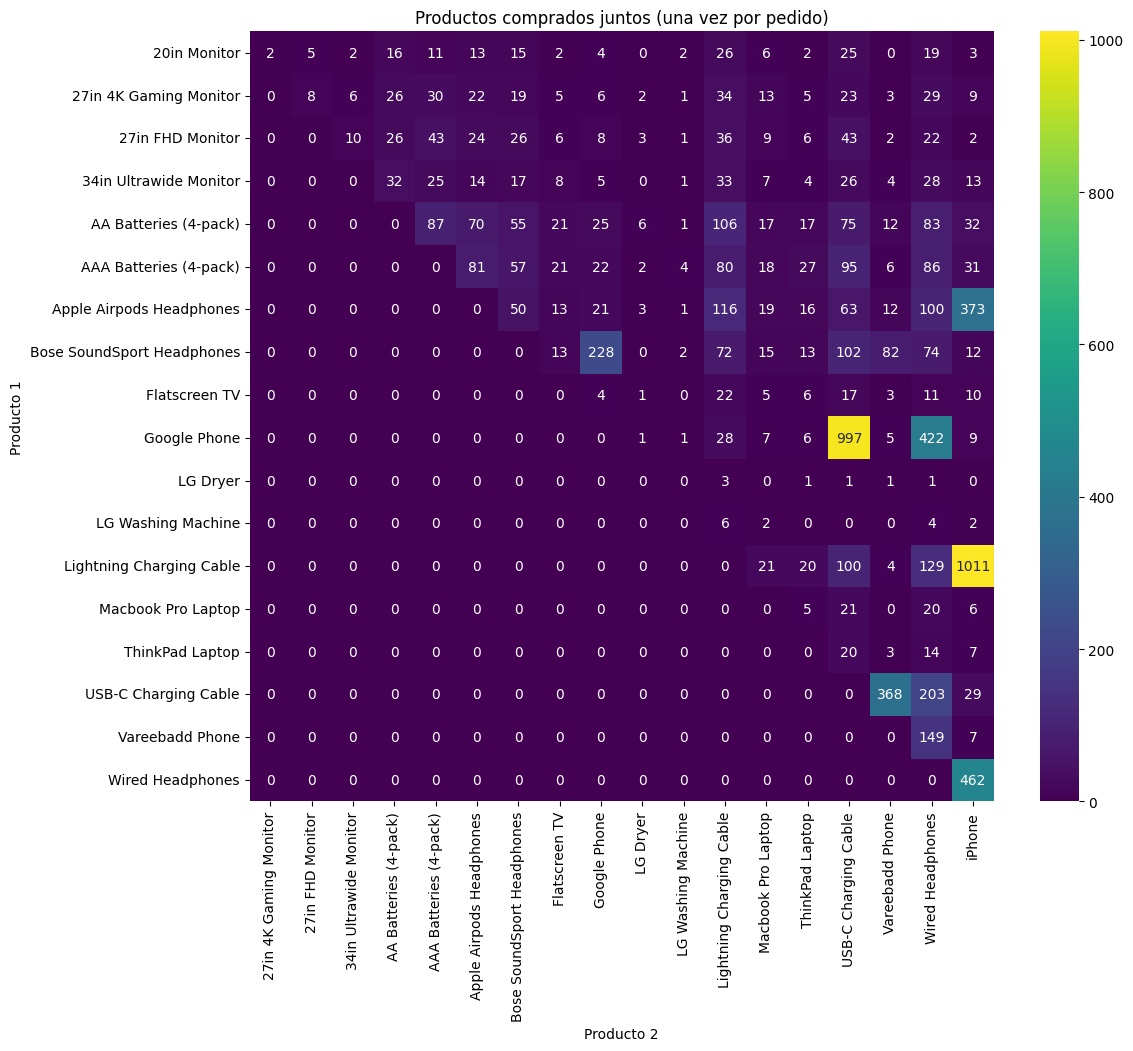

In [16]:
# Filtramos para obtener aquellos pedidos con más de un producto
df_multiples = ventas_consolidado.groupby('ID de Pedido').filter(lambda x: len(x) > 1)

# Eliminamos duplicados de productos dentro de cada pedido (clave!)
df_multiples = df_multiples.drop_duplicates(subset=['ID de Pedido', 'Producto'])

# Hacemos el merge para armar los pares
df_pares = df_multiples.merge(df_multiples, on='ID de Pedido')

# Sacamos pares repetidos y pares del mismo producto
df_pares = df_pares[df_pares['Producto_x'] < df_pares['Producto_y']]

# Ahora contamos, pero como ya eliminamos duplicados, cada par aparece una vez por pedido
conteo_pares = df_pares.groupby(['Producto_x','Producto_y']).size().reset_index(name='Cantidad')

# Transformamos en matriz cuadrada
matriz_pares = conteo_pares.pivot(index='Producto_x', columns='Producto_y', values='Cantidad').fillna(0)

# Graficamos
plt.figure(figsize=(12,10))
sns.heatmap(matriz_pares, cmap='viridis', annot=True, fmt='g')
plt.title("Productos comprados juntos (una vez por pedido)")
plt.xlabel("Producto 2")
plt.ylabel("Producto 1")
plt.show()


6. Impacto de eventos especiales en las ventas

* ¿Se ha observado algún aumento o disminución significativa en las ventas en días cercanos a eventos especiales, como días festivos?
* ¿Qué eventos específicos han tenido un impacto notable en el comportamiento de las ventas y cómo se manifestó ese impacto?

In [17]:
#Creamos una funcion que recibe un dia y un mes
def dateSelector(day, month):
    # Filtramos todas las filas que coinciden con día y mes
    grupo_ventas = ventas_concatenadas[
        (ventas_concatenadas['Fecha de Pedido'].dt.day == day) &
        (ventas_concatenadas['Fecha de Pedido'].dt.month == month)
    ].copy()
    
    #Si no hubo ventas ese dia, devuelve un mensaje
    if grupo_ventas.empty:
        print(f"No se encontraron ventas el {day}/{month} en ningún año.")
        return pd.DataFrame()
    
    # Agrupamos por producto y sumamos la cantidad pedida
    grupo_ventas = grupo_ventas.groupby('Producto')["Cantidad Pedida"].sum().reset_index()
    return grupo_ventas 

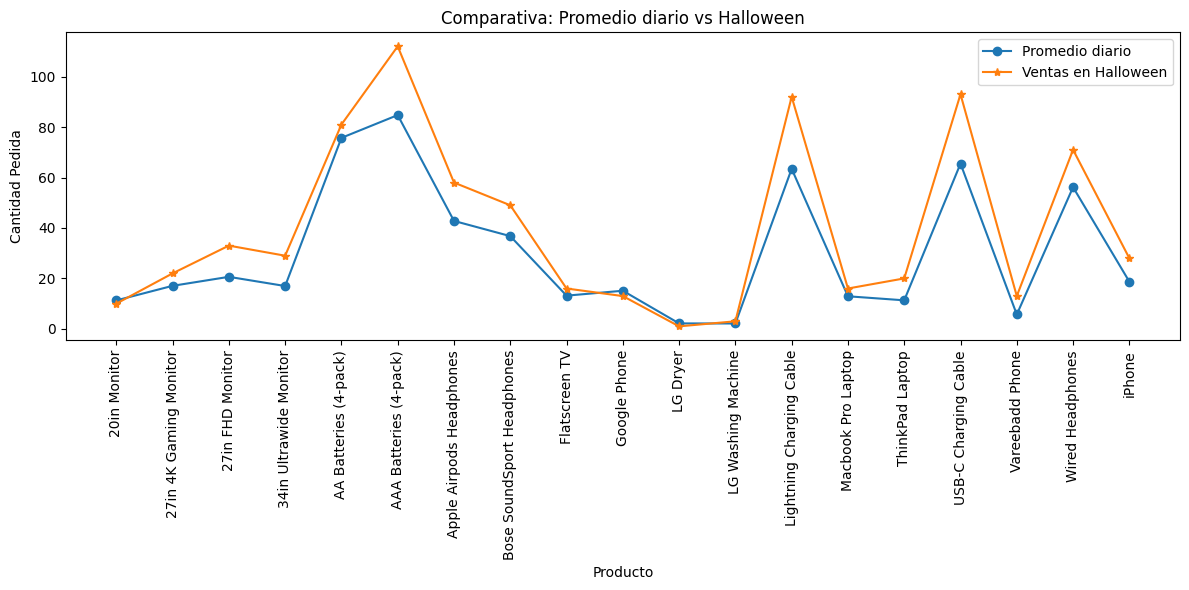

In [18]:
## HALLOWEEN

#LLamamos a la funcion para obtener las ventas de esa fecha especifica
halloween = dateSelector(31, 10)

if halloween.empty:
    print("No hay ventas en esta fecha")
else:
    # Calculamos cuanto se vendio de cada producto cada dia
    ventas_diarias = ventas_concatenadas.groupby(
        [ventas_concatenadas['Fecha de Pedido'].dt.date, 'Producto']
    )['Cantidad Pedida'].sum().reset_index()

    # Caclulamos el promedio de ventas por dia para cada producto
    df_ventas_por_dia = ventas_diarias.groupby('Producto')['Cantidad Pedida'].mean().reset_index()
    
    # Ponemos ambos dataframes con los productos como indice para compararlos
    df_ventas_por_dia = df_ventas_por_dia.set_index('Producto')
    halloween = halloween.set_index('Producto')
    
    productos = halloween.index
    daily_average = df_ventas_por_dia.loc[productos, "Cantidad Pedida"]
    halloween_mean = halloween["Cantidad Pedida"]

    # Graficamos
    plt.figure(figsize=(12,6))
    plt.plot(productos, daily_average, marker='o', label='Promedio diario')
    plt.plot(productos, halloween_mean, marker='*', label='Ventas en Halloween')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Pedida')
    plt.title('Comparativa: Promedio diario vs Halloween')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

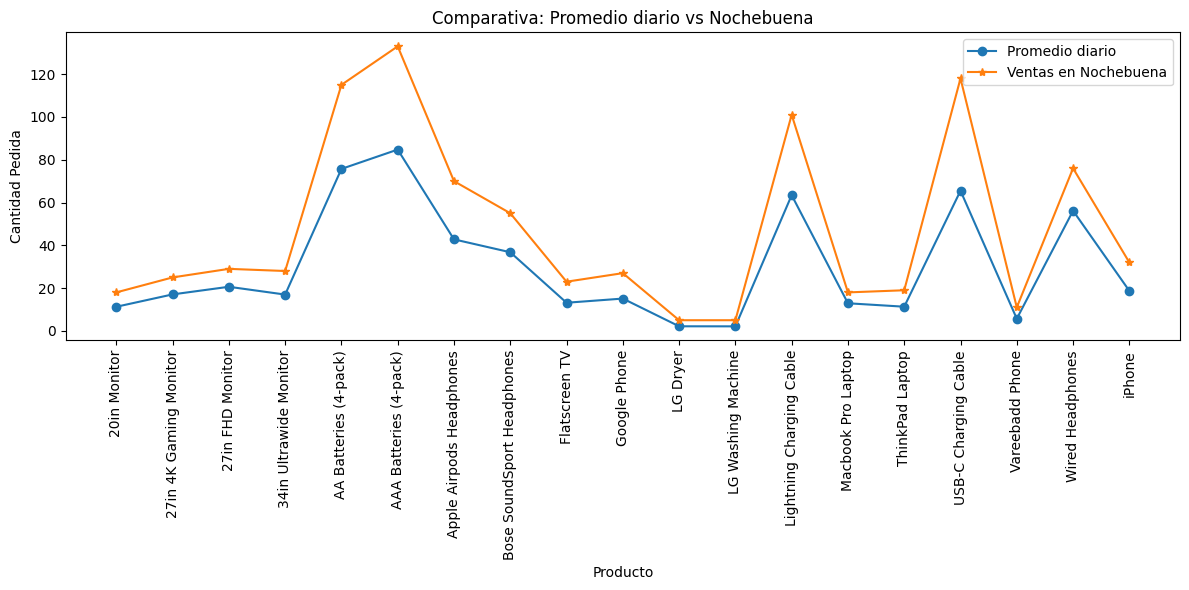

In [19]:
## NAVIDAD

noche_buena = dateSelector(24,12)

if noche_buena.empty:
    print("No hay ventas el 24/12 en ningún año disponible.")
else:
    ventas_diarias = ventas_concatenadas.groupby(
        [ventas_concatenadas['Fecha de Pedido'].dt.date, 'Producto']
    )['Cantidad Pedida'].sum().reset_index()

    df_ventas_por_dia = ventas_diarias.groupby('Producto')['Cantidad Pedida'].mean().reset_index()
    
    df_ventas_por_dia = df_ventas_por_dia.set_index('Producto')
    noche_buena = noche_buena.set_index('Producto')
    
    productos = noche_buena.index
    daily_average = df_ventas_por_dia.loc[productos, "Cantidad Pedida"]
    noche_buena_mean = noche_buena["Cantidad Pedida"]

    plt.figure(figsize=(12,6))
    plt.plot(productos, daily_average, marker='o', label='Promedio diario')
    plt.plot(productos, noche_buena_mean, marker='*', label='Ventas en Nochebuena')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Pedida')
    plt.title('Comparativa: Promedio diario vs Nochebuena')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


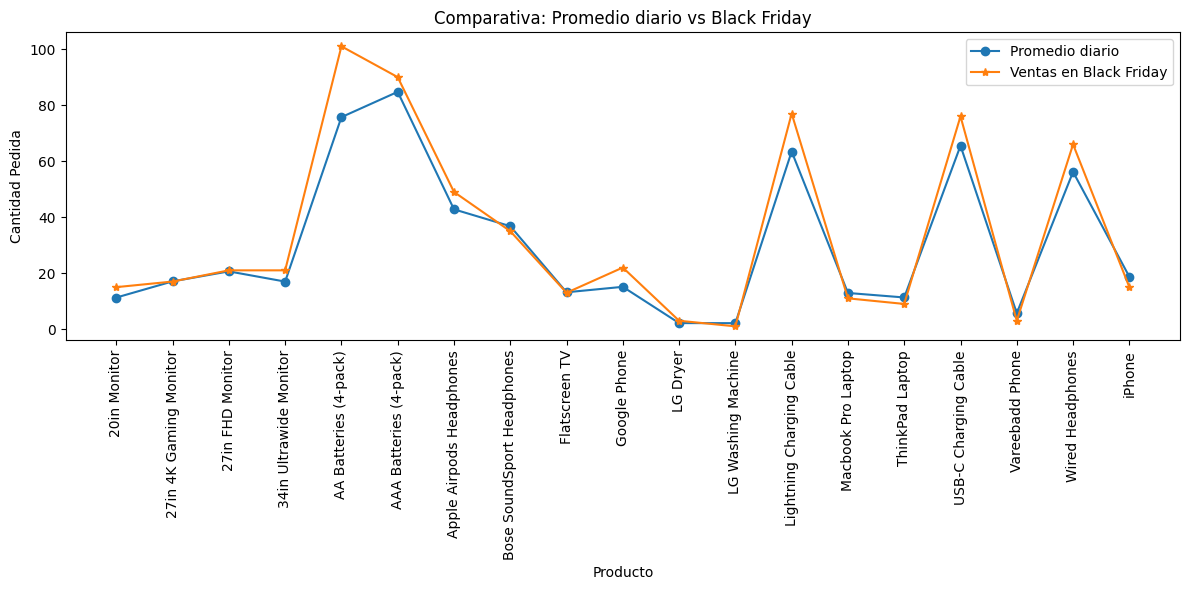

In [20]:
## BLACK FRIDAY

black_friday = dateSelector(29,11)

if black_friday.empty:
    print("No hay ventas el 29/11 en ningún año disponible")
else:
    ventas_diarias = ventas_concatenadas.groupby(
        [ventas_concatenadas['Fecha de Pedido'].dt.date, 'Producto']
    )['Cantidad Pedida'].sum().reset_index()

    df_ventas_por_dia = ventas_diarias.groupby('Producto')['Cantidad Pedida'].mean().reset_index()
    
    df_ventas_por_dia = df_ventas_por_dia.set_index('Producto')
    black_friday = black_friday.set_index('Producto')
    
    productos = black_friday.index
    daily_average = df_ventas_por_dia.loc[productos, "Cantidad Pedida"]
    black_friday_mean = black_friday["Cantidad Pedida"]

    plt.figure(figsize=(12,6))
    plt.plot(productos, daily_average, marker='o', label='Promedio diario')
    plt.plot(productos, black_friday_mean, marker='*', label='Ventas en Black Friday')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Pedida')
    plt.title('Comparativa: Promedio diario vs Black Friday')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


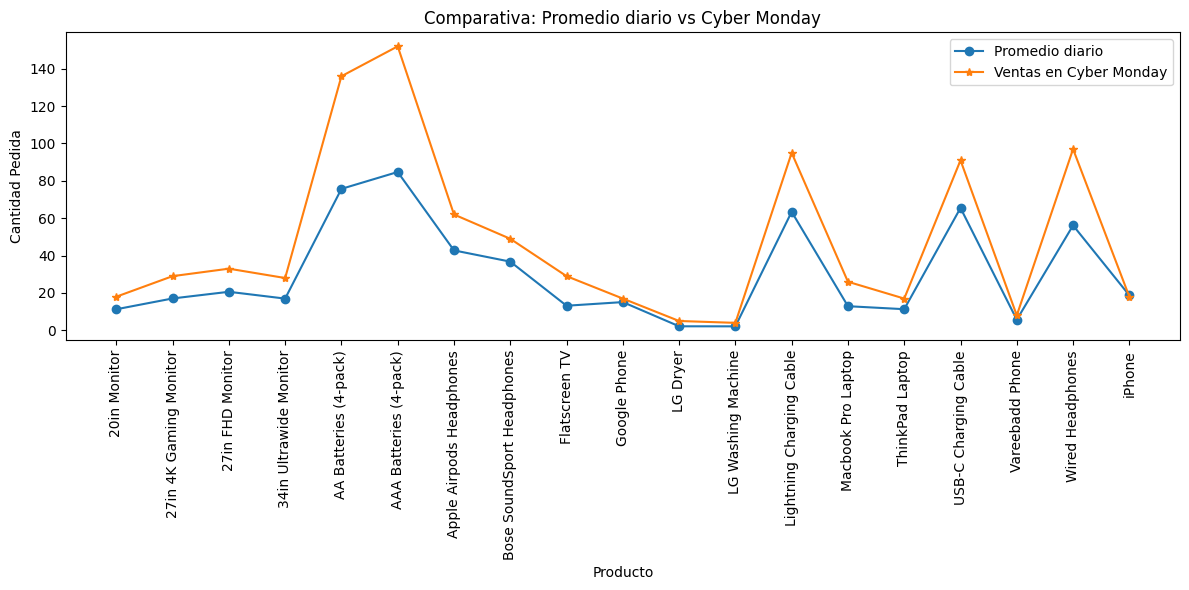

In [21]:
## CYBER MONDAY

cyber_monday = dateSelector(2,12)

if cyber_monday.empty:
    print("No hay ventas el 2/12 en ningún año disponible")
else:
    ventas_diarias = ventas_concatenadas.groupby(
        [ventas_concatenadas['Fecha de Pedido'].dt.date, 'Producto']
    )['Cantidad Pedida'].sum().reset_index()

    df_ventas_por_dia = ventas_diarias.groupby('Producto')['Cantidad Pedida'].mean().reset_index()
    
    df_ventas_por_dia = df_ventas_por_dia.set_index('Producto')
    cyber_monday = cyber_monday.set_index('Producto')
    
    productos = cyber_monday.index
    daily_average = df_ventas_por_dia.loc[productos, "Cantidad Pedida"]
    cyber_monday_mean = cyber_monday["Cantidad Pedida"]

    plt.figure(figsize=(12,6))
    plt.plot(productos, daily_average, marker='o', label='Promedio diario')
    plt.plot(productos, cyber_monday_mean, marker='*', label='Ventas en Cyber Monday')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Pedida')
    plt.title('Comparativa: Promedio diario vs Cyber Monday')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


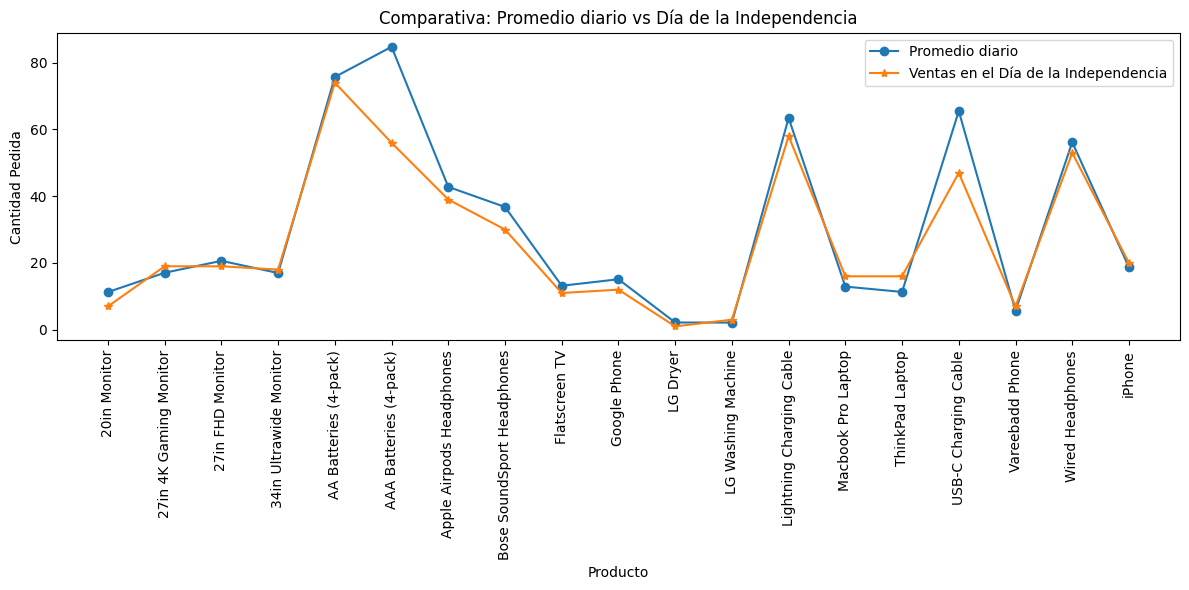

In [22]:
## DIA DE LA INDEPENDENCIA

dia_ind = dateSelector(4,7)

if dia_ind.empty:
    print("No hay ventas el 04/07 en ningún año disponible.")
else:
    ventas_diarias = ventas_concatenadas.groupby(
        [ventas_concatenadas['Fecha de Pedido'].dt.date, 'Producto']
    )['Cantidad Pedida'].sum().reset_index()

    df_ventas_por_dia = ventas_diarias.groupby('Producto')['Cantidad Pedida'].mean().reset_index()
    
    df_ventas_por_dia = df_ventas_por_dia.set_index('Producto')
    dia_ind = dia_ind.set_index('Producto')
    
    productos = dia_ind.index
    daily_average = df_ventas_por_dia.loc[productos, "Cantidad Pedida"]
    dia_ind_mean = dia_ind["Cantidad Pedida"]

    plt.figure(figsize=(12,6))
    plt.plot(productos, daily_average, marker='o', label='Promedio diario')
    plt.plot(productos, dia_ind_mean, marker='*', label='Ventas en el Día de la Independencia')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Pedida')
    plt.title('Comparativa: Promedio diario vs Día de la Independencia')
    plt.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


7. Punto EXTRA: Relación cantidad pedida/precios

Se nos ocurrió realizar una correlación entre los productos y el ingreso percibido, para saber si:
- Los productos más pedidos, por ser más pedidos, hacen una diferenciación en el ingreso percibido
- Existen productos "estrella", que generen más ingresos aunque se vendan menos

De esta manera podemos saber que conviene priorizar en torno a stock/publicidad

In [23]:
#Creamos la columna "Ingresos", calculamos el ingreso del pedido multiplicando el precio unitario por la cantidad pedida
ventas_concatenadas['Ingresos'] = ventas_concatenadas['Precio Unitario'] * ventas_concatenadas['Cantidad Pedida']

#Agrupamos las filas que tienen el mismo producto, sumamos unidades vendidas e ingresos totales de cada producto
ventas_producto = ventas_concatenadas.groupby('Producto').agg({
    'Cantidad Pedida': 'sum',
    'Ingresos': 'sum'
}).reset_index()

#Graficamos
fig = px.scatter(
    ventas_producto,
    x='Cantidad Pedida',
    y='Ingresos',
    size='Ingresos',
    color='Ingresos',
    hover_data=['Producto', 'Cantidad Pedida', 'Ingresos'],
    title='Relación entre cantidad pedida e ingresos por producto'
)
fig.show()